In [10]:
#Hacerlo simbolico
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import symbols, Matrix, pi,deg, cos, sin,atan, simplify, eye, solve, latex, atan2, pprint, init_printing, Derivative, sqrt
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting, Point
from sklearn.metrics import mean_squared_error

In [ ]:
N = ReferenceFrame('N')
theta = dynamicsymbols('theta')
r = symbols('r')
posicion = r*(1-cos(theta))*N.x
t = symbols('t')

velocidad = posicion.diff(t, N)
aceleracion = velocidad.diff(t, N)

In [ ]:
#hacer sustituciones
lista_theta_punto = [np.pi/2, np.pi/4, *np.pi/8, np.pi/10,np.pi/32]
for theta_punto in lista_theta_punto:
    posicion_i = posicion.subs({theta.diff(t): theta_punto})
    velocidad_sust = velocidad.subs({theta.diff(t): theta_punto})
    aceleracion_sust = aceleracion.subs({theta.diff(t): theta_punto})
    plt.plot(posicion_i, label=f'θ\'={theta_punto} rad/s')
    
#hacer graficas

Eror velocidad: 0.007852242680069128
Error aceleracion 0.15283206700531435
Eror velocidad: 0.006715930125210354
Error aceleracion 0.6370097612688579
Eror velocidad: 0.0008158283550098663
Error aceleracion 0.08203594929261335
Eror velocidad: 1.736548686037848e-05
Error aceleracion 0.00012762105193115877
Eror velocidad: 6.740093032472605e-05
Error aceleracion 0.006843357165175981


<Figure size 1000x1000 with 0 Axes>

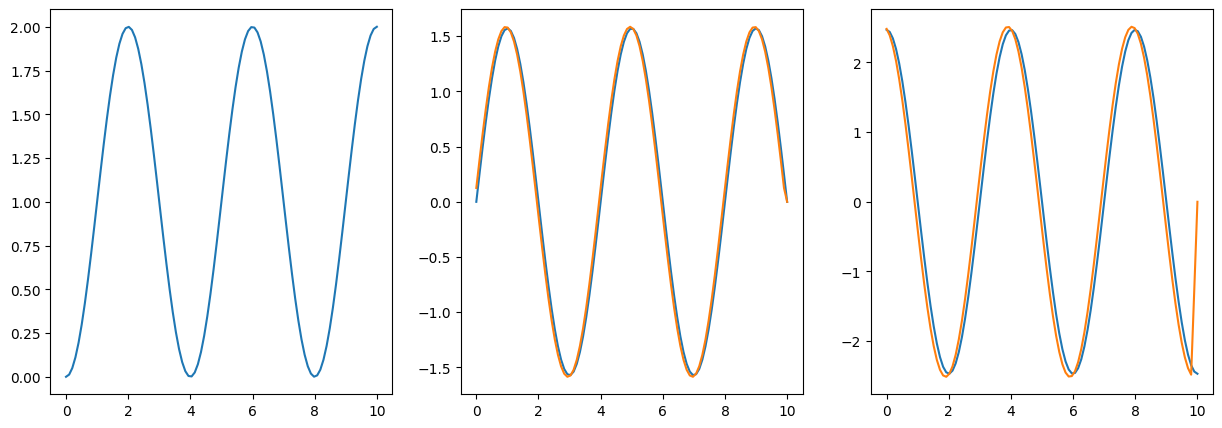

<Figure size 1000x1000 with 0 Axes>

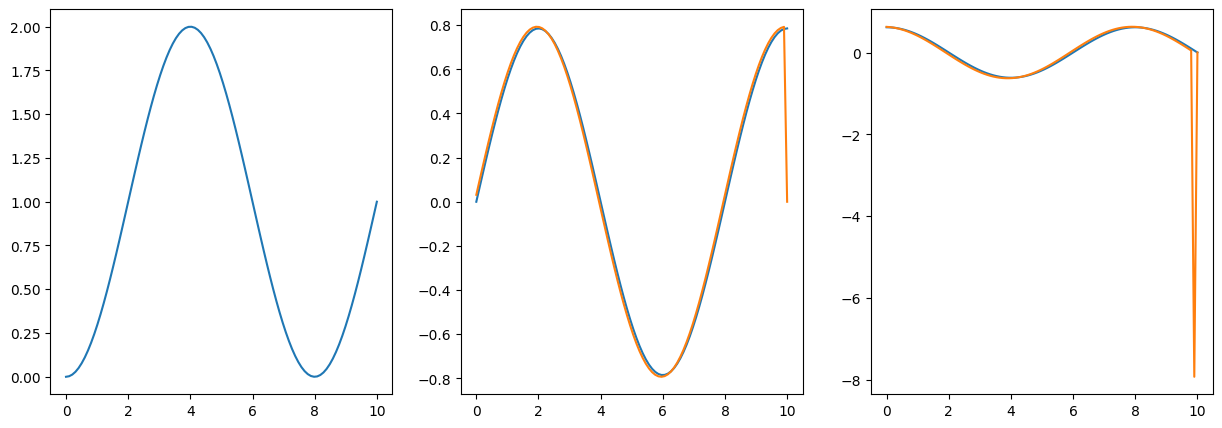

<Figure size 1000x1000 with 0 Axes>

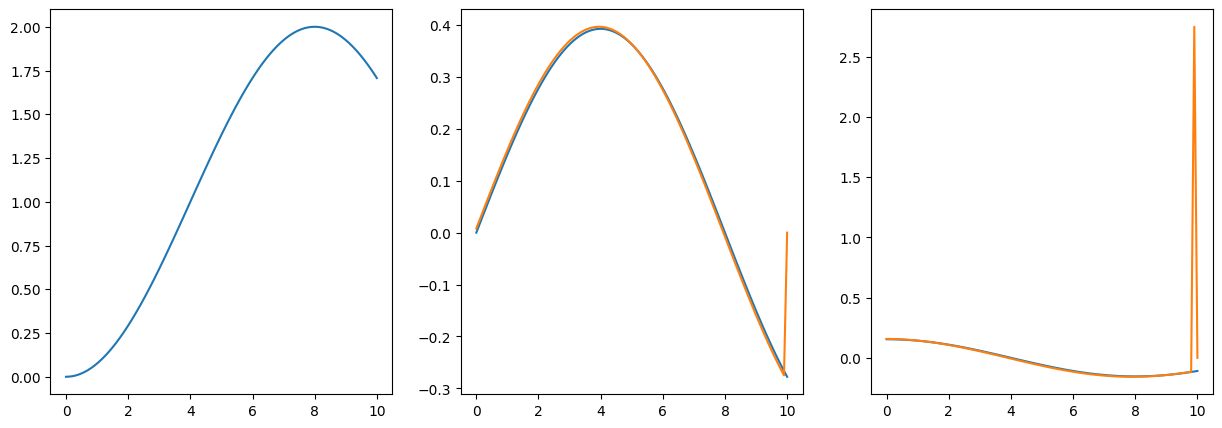

<Figure size 1000x1000 with 0 Axes>

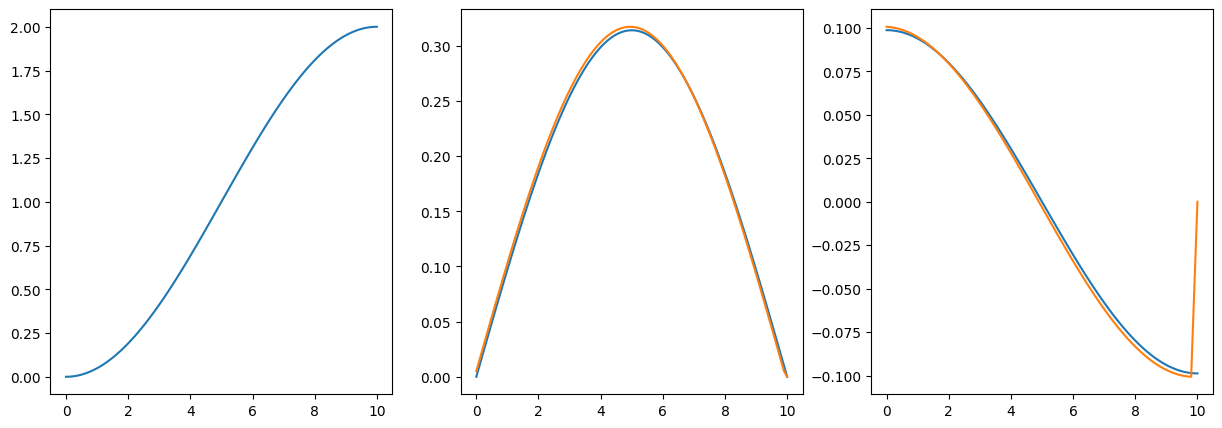

<Figure size 1000x1000 with 0 Axes>

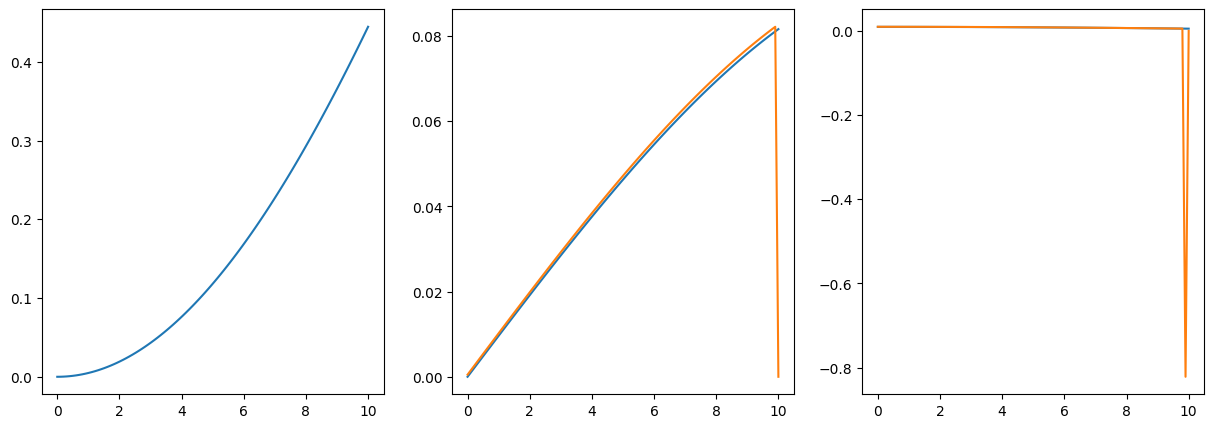

In [12]:
r = 1 #unidad dm
l = 2 # unidad dm
#Solucion analitica
lista_theta_punto = [np.pi/2, np.pi/4, np.pi/8, np.pi/10,np.pi/32] #theta punto es el mismo omega

t = np.linspace(0, 10, 100) #tiempo, toma datos cada 0,1 segundos
dt = 0.1 #tiempo cada cuando se toma una muestra

def cinematica(thetha,omega):
    global r, l
    posicion = r*(1-np.cos(theta))
    velocidad = np.sin(theta)*omega # la derivada de r(1-cos) = derivada r - cos = derivada - cos = sintheta, pero como theta es funcion, multiplicada por su derivada
    aceleracion = np.cos(theta)*omega**2 #sale otro theta por la derivada interna de coseno
    v2 = derivar(posicion, dt)
    a2 = derivar(v2, dt)
    return posicion, velocidad, aceleracion, v2, a2
     
#derivar vectores
def derivar(variable, dt):
    derivada = [0]*len(variable) #es mas eficiente crear el espacio de una que hacerle .append()
    for i in range(len(variable)):
        if i != len(variable)-1: #hacemos que no aparezca ind ex out of range
            derivada[i] = (variable[i+1] - variable[i]) / dt
        else:
            derivada[i] = 0
    return derivada
    
    #sale un vector menos
    
for angle_speed in lista_theta_punto:
    theta = angle_speed*t #el angulo es su derivada por el tiempo
    
    
    #crear los espacios
    posicion = [None]*len(t)
    velocidad = [None]*len(t)
    aceleracion = [None]*len(t)
    v2 = [None]*len(t-1)
    a2 = [None]*len(t-1)
    
    posicion, velocidad, aceleracion, v2, a2 = cinematica(theta, angle_speed)
    
    ax, fig = plt.figure(figsize=(10, 10)), plt.subplots(1, 3, figsize=(15, 5))

    
    #posicion
    plt.subplot(1,3,1)
    plt.plot(t, posicion)
    
    #velocidad
    plt.subplot(1,3,2)
    plt.plot(t, velocidad)
    plt.plot(t, v2)
    
    #aceleracion
    plt.subplot(1,3,3)
    plt.plot(t, aceleracion)
    plt.plot(t, a2)
    
    #errores
    error_velocidad = mean_squared_error( [velocidad],  [v2])
    error_aceleracion = mean_squared_error( [aceleracion],  [a2])
    
    print("Eror velocidad:", error_velocidad)
    print("Error aceleracion", error_aceleracion)
    

             
    
        